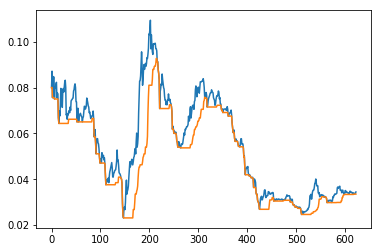

In [48]:
import binance_trading.get_data as bgd
import futures_charts.generic_charts as gc
import shared.calendar_utilities as cu
data_out = bgd.get_daily_price_data4ticker(ticker='ETHBTC')

data_out['rolling_min'] = data_out['low'].rolling(20,min_periods=1).min()
data_out[['low','rolling_min']]

import matplotlib.pyplot as plt
%matplotlib inline
#trade_data=big_data
plt.plot(range(len(data_out.index)),data_out['low'],
        range(len(data_out.index)),data_out['rolling_min'])
plt.show()

In [2]:
import backtesting.utilities as bu
dates_output = bu.get_backtesting_dates(date_to=20190215,years_back=2)
double_dates = sorted(dates_output['double_dates'],reverse=False)
double_dates

[20170215,
 20170222,
 20170301,
 20170308,
 20170315,
 20170322,
 20170329,
 20170405,
 20170412,
 20170419,
 20170426,
 20170503,
 20170510,
 20170517,
 20170524,
 20170531,
 20170607,
 20170614,
 20170621,
 20170628,
 20170705,
 20170712,
 20170719,
 20170726,
 20170802,
 20170809,
 20170816,
 20170823,
 20170830,
 20170906,
 20170913,
 20170920,
 20170927,
 20171004,
 20171011,
 20171018,
 20171025,
 20171101,
 20171108,
 20171115,
 20171122,
 20171129,
 20171206,
 20171213,
 20171220,
 20171227,
 20180103,
 20180110,
 20180117,
 20180124,
 20180131,
 20180207,
 20180214,
 20180221,
 20180228,
 20180307,
 20180314,
 20180321,
 20180328,
 20180404,
 20180411,
 20180418,
 20180425,
 20180502,
 20180509,
 20180516,
 20180523,
 20180530,
 20180606,
 20180613,
 20180620,
 20180627,
 20180711,
 20180718,
 20180725,
 20180801,
 20180808,
 20180815,
 20180822,
 20180829,
 20180905,
 20180912,
 20180919,
 20180926,
 20181003,
 20181010,
 20181017,
 20181024,
 20181031,
 20181107,
 20181114,

In [3]:
import opportunity_constructs.crypto_momentum as cm
output_list = []

for report_date in double_dates:
    print(report_date)
    output = cm.get_crypto_momentum_frame(report_date=report_date)
    if output['success']:
        output_list.append(output['btc_pair_frame'])
        


20170215
20170222
20170301
20170308
20170315
20170322
20170329
20170405
20170412
20170419
20170426
20170503
20170510
20170517
20170524
20170531
20170607
20170614
20170621
20170628
20170705
20170712
20170719
20170726
20170802
20170809
20170816
20170823
20170830
20170906
20170913
20170920
20170927
20171004
20171011
20171018
20171025
20171101
20171108
20171115
20171122
20171129
20171206
20171213
20171220
20171227
20180103
20180110
20180117
20180124
20180131
20180207
20180214
20180221
20180228
20180307
20180314
20180321
20180328
20180404
20180411
20180418
20180425
20180502
20180509
20180516
20180523
20180530
20180606
20180613
20180620
20180627
20180711
20180718
20180725
20180801
20180808
20180815
20180822
20180829
20180905
20180912
20180919
20180926
20181003
20181010
20181017
20181024
20181031
20181107
20181114
20181121
20181128
20181205
20181212
20181219
20181226
20190102
20190109
20190116
20190123
20190130
20190206
20190213


In [4]:
import pandas as pd
output_frame = pd.concat(output_list)

In [34]:
import math as m
report_date_list = []
perChange_10_list = []
perChange10_list = []
btc_momentum_pnl_list = []
alt_momentum1_pnl_list = []
alt_momentum2_pnl_list = []

backtest_results = pd.DataFrame()

for i in range(len(double_dates)):
    daily_frame = output_frame[output_frame['report_date']==double_dates[i]]
    btc_index = daily_frame['symbol']=='BTCUSDT'
    btc_row = daily_frame[btc_index]
    alt_frame = daily_frame[~btc_index]

    if not m.isnan(btc_row['perChange_10'].iloc[0]):
        perChange_10_list.append(btc_row['perChange_10'].iloc[0])
        perChange10_list.append(btc_row['perChange10'].iloc[0])
        report_date_list.append(double_dates[i])
        if btc_row['perChange_10'].iloc[0]>0:
            btc_momentum_pnl_list.append(btc_row['perChange10'].iloc[0])
        else:
            btc_momentum_pnl_list.append(0)
        
        clean_frame = alt_frame.dropna()
        clean_frame = clean_frame[clean_frame['perChange_10']>0]
        clean_frame.sort_values(['perChange_10'], ascending=[False], inplace=True)
        alt_momentum1_pnl_list.append(clean_frame['perChange10'].iloc[:9].mean())
        
        liquid_frame = clean_frame[clean_frame['volume']>500]
        alt_momentum2_pnl_list.append(liquid_frame['perChange10'].iloc[:4].mean())
        
    
backtest_results['report_date'] = report_date_list
backtest_results['perChange_10'] = perChange_10_list
backtest_results['perChange10'] = perChange10_list
backtest_results['btc_momentum_pnl'] = btc_momentum_pnl_list
backtest_results['alt_momentum1_pnl'] = alt_momentum1_pnl_list
backtest_results['alt_momentum2_pnl'] = alt_momentum2_pnl_list

In [40]:
backtest_results.iloc[20:30]

,report_date,perChange_10,perChange10,btc_momentum_pnl,alt_momentum1_pnl,alt_momentum2_pnl
20,20180117,-31.958083,4.570203,0.000000,18.844095,31.182284
21,20180124,-15.769956,-18.943012,0.000000,-8.278403,-8.282966
22,20180131,-10.797051,-17.025795,0.000000,-16.192832,-10.919625
23,20180207,-36.035084,45.276352,0.000000,-13.970646,-8.776987
24,20180214,15.457659,2.587516,2.587516,-10.729763,-5.167393
25,20180221,29.436450,9.838277,9.838277,-6.508345,-18.123680
26,20180228,-0.545773,-15.072879,0.000000,-20.636936,-24.245767
27,20180307,3.336809,-21.041372,-21.041372,-20.208268,-23.391193
28,20180314,-29.049066,4.612729,0.000000,-3.404022,-1.168236
29,20180321,-6.803013,-22.071919,0.000000,-2.169102,-0.427582


In [41]:
# Case Studies

daily_frame = output_frame[output_frame['report_date']==20180228]
btc_index = daily_frame['symbol']=='BTCUSDT'
btc_row = daily_frame[btc_index]
alt_frame = daily_frame[~btc_index]
clean_frame = alt_frame.dropna()
clean_frame.sort_values(['perChange_10'], ascending=[False], inplace=True)
display(clean_frame)
liquid_frame = clean_frame[clean_frame['volume']>500]
display(liquid_frame)

,symbol,close,volume,perChange_10,perChange_30,perChange_90,perChange10,perChange30,report_date
74,DGDBTC,0.054172,8771.936676,75.666386,166.489571,440.800639,-28.311674,-33.971424,20180228
60,BCPTBTC,0.000114,2496.912607,54.006734,42.049689,308.977110,-30.371666,-52.881504,20180228
13,OMGBTC,0.001774,1684.068263,13.282248,17.873754,119.012346,-14.148816,-31.961669,20180228
61,ARNBTC,0.000213,483.582985,6.065140,-16.761264,396.845794,-15.998119,-33.233012,20180228
3,NEOBTC,0.012749,4116.954212,5.686811,-14.693878,285.282563,-24.150914,-42.426857,20180228
41,EVXBTC,0.000217,92.270377,2.835700,-34.258472,68.837246,-16.775982,-33.205543,20180228
17,BQXBTC,0.000379,367.695155,1.255409,-11.841860,157.772338,-14.701382,-21.132742,20180228
2,BNBBTC,0.001013,3400.288908,-1.392405,-11.127688,406.350000,-13.824430,50.064185,20180228
62,GVTBTC,0.002535,342.902085,-1.595125,29.779393,266.190064,46.965096,23.608756,20180228
30,ETCBTC,0.003220,2733.055760,-1.829268,16.161616,23.182862,-26.832298,-34.906832,20180228


,symbol,close,volume,perChange_10,perChange_30,perChange_90,perChange10,perChange30,report_date
74,DGDBTC,0.054172,8771.936676,75.666386,166.489571,440.800639,-28.311674,-33.971424,20180228
60,BCPTBTC,0.000114,2496.912607,54.006734,42.049689,308.977110,-30.371666,-52.881504,20180228
13,OMGBTC,0.001774,1684.068263,13.282248,17.873754,119.012346,-14.148816,-31.961669,20180228
3,NEOBTC,0.012749,4116.954212,5.686811,-14.693878,285.282563,-24.150914,-42.426857,20180228
2,BNBBTC,0.001013,3400.288908,-1.392405,-11.127688,406.350000,-13.824430,50.064185,20180228
30,ETCBTC,0.003220,2733.055760,-1.829268,16.161616,23.182862,-26.832298,-34.906832,20180228
1,LTCBTC,0.019539,1968.341488,-4.878049,21.164579,125.077756,3.024720,-11.535903,20180228
26,MTLBTC,0.000422,1182.370912,-5.168539,-0.236407,-10.212766,0.473934,20.971564,20180228
0,ETHBTC,0.082605,9471.136763,-5.808504,-20.982399,89.239651,-6.058955,-30.493312,20180228
21,IOTABTC,0.000178,747.891553,-6.005167,-22.199433,37.138462,-17.063047,-9.277541,20180228


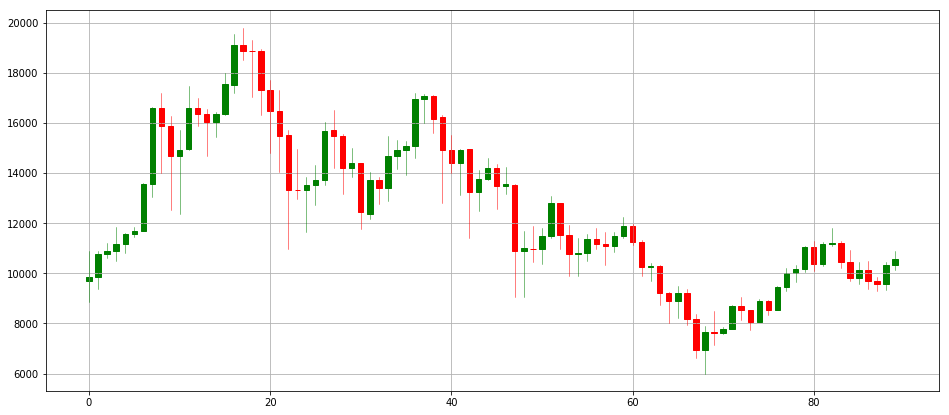

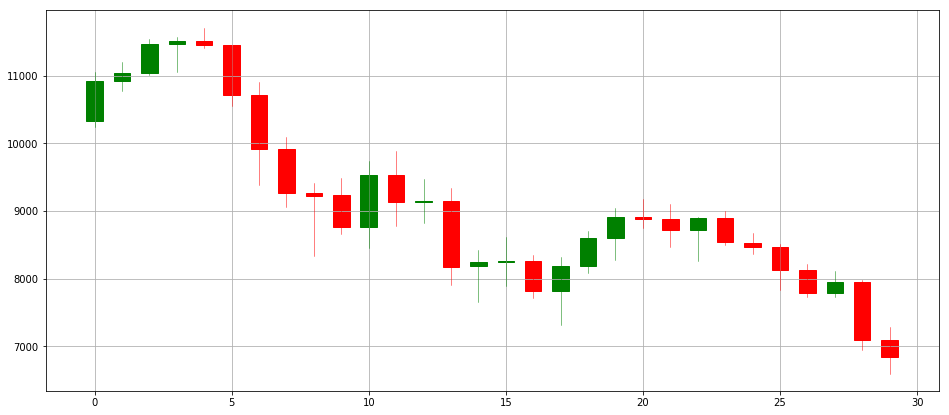

In [44]:
# time series plots

import binance_trading.get_data as bgd
import futures_charts.generic_charts as gc
import shared.calendar_utilities as cu
center_date = 20180228
center_datetime = cu.convert_doubledate_2datetime(center_date)
data_out = bgd.get_daily_price_data4ticker(ticker='BTCUSDT')
data_out1 = data_out[data_out['openDate']<center_datetime.date()]
%matplotlib inline
gc.get_candlestick_chart(data2plot=data_out1.iloc[-90:])

data_out2 = data_out[data_out['openDate']>center_datetime.date()]
gc.get_candlestick_chart(data2plot=data_out2.iloc[:30])


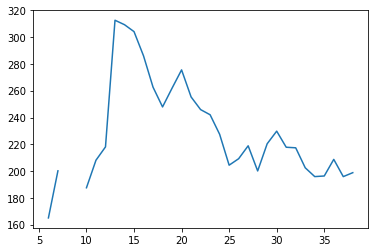

In [36]:
backtest_results['perChange10'].cumsum()
import matplotlib.pyplot as plt
%matplotlib inline
#trade_data=big_data
plt.plot(range(len(select_results.index)),select_results['alt_momentum2_pnl'].cumsum())
plt.show()

In [32]:
backtest_results['perChange10'].mean()

1.3865461248473148

In [35]:
print(backtest_results['alt_momentum2_pnl'].mean())
select_results = backtest_results[backtest_results['perChange_10']>0]
select_results['alt_momentum2_pnl'].mean()

3.0617169334630066


6.413486841971621